In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
from google.colab import drive #to import the google drive data

In [ ]:
drive.mount('/content/drive')  #to mount the drive data into colab cloud and enter the activation code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5zeMoCOTJa06EzonS_QD8xnO2JWvTJuZCP0AhkSkPtypATnic-g3w
Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Files"

/content/drive/My Drive/Colab Notebooks/Files


In [ ]:
dataset = pd.read_csv('heart.csv') #reading CSV file

In [ ]:
dataset.head() #printing first five values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:

dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:

dataset.shape #to know datapoint and feature

(303, 14)

In [ ]:
X_inputFeatures = dataset.iloc[:,:12] #seprating indipendent input feature

In [ ]:
X_inputFeatures

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [ ]:
Y_targetVariable = dataset.iloc[:,-1] #seprating target variable

In [ ]:
Y_targetVariable

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
isHeartatrisk=dataset.loc[Y_targetVariable==1] #seprating the patients
isHeartnotatrisk=dataset.loc[Y_targetVariable==0]

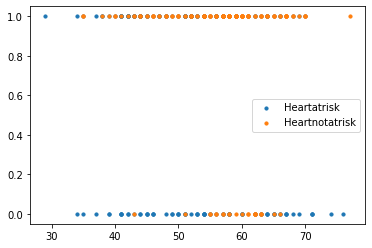

Text(0.5, 1.0, 'Graph for the people who have heart risk or no heart risk based on their age and sex')

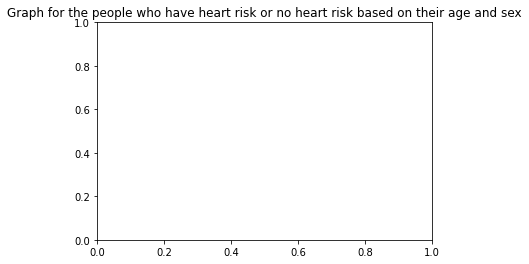

In [ ]:
#plot to show difference
plt.scatter(isHeartatrisk.iloc[:,0],isHeartatrisk.iloc[:,1],s=10,label='Heartatrisk')
plt.scatter(isHeartnotatrisk.iloc[:,0],isHeartnotatrisk.iloc[:,1],s=10,label='Heartnotatrisk')
plt.legend()
plt.show()
plt.title('Graph for the people who have heart risk or no heart risk based on their age and sex')

In [ ]:
from sklearn.model_selection import train_test_split #library for training and testing

In [ ]:
#converting to array
X_inputFeatures=np.array(X_inputFeatures)
Y_targetVariable=np.array(Y_targetVariable)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_inputFeatures,Y_targetVariable,test_size=0.30,random_state=48) #first train and test data for feature

In [ ]:
# seeing seprated values
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(212, 12)
(91, 12)
(212,)
(91,)


In [ ]:
from sklearn.linear_model import LogisticRegression #importing logistic regression model

In [ ]:

modellogisticregression = LogisticRegression()  #making model

In [ ]:
modellogisticregression.fit(X_train,Y_train) #fitting model for training data

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Predictionmodel = modellogisticregression.predict(X_test) #predicting the model 

In [ ]:
from sklearn import metrics #printing confusion matrix and importing library

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test,Predictionmodel)

In [ ]:
confusion_matrix

array([[37,  8],
       [ 7, 39]])

In [ ]:
#printing the Parameter for the model learining like accuracy , precision and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Predictionmodel))
print("Precision:",metrics.precision_score(Y_test, Predictionmodel))
print("Recall:",metrics.recall_score(Y_test, Predictionmodel))

Accuracy: 0.8351648351648352
Precision: 0.8297872340425532
Recall: 0.8478260869565217
